In [1]:
from tensorflow.keras import models
import pandas as pd
import numpy as np

In [2]:
model1=models.load_model("Models/model2_R.h5")

In [4]:
test=pd.read_csv("DailyDelhiClimateTrain.csv")
test

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...,...
1457,2016-12-28,17.217391,68.043478,3.547826,1015.565217
1458,2016-12-29,15.238095,87.857143,6.000000,1016.904762
1459,2016-12-30,14.095238,89.666667,6.266667,1017.904762
1460,2016-12-31,15.052632,87.000000,7.325000,1016.100000


In [5]:
test.isnull().sum()

date            0
meantemp        0
humidity        0
wind_speed      0
meanpressure    0
dtype: int64

In [6]:
test["date"]=pd.to_datetime(test["date"])
test.set_index("date",inplace=True)
test

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...
2016-12-28,17.217391,68.043478,3.547826,1015.565217
2016-12-29,15.238095,87.857143,6.000000,1016.904762
2016-12-30,14.095238,89.666667,6.266667,1017.904762


In [7]:
def extract_year(value):
  value=value.strftime('%Y-%m-%d')
  return (value[0:4])

In [8]:
def extract_month(value):
    value=value.strftime('%Y-%m-%d')
    return (value[4:6])

In [9]:
def extract_date(value):
    value=value.strftime('%Y-%m-%d')
    return (value[6:8])

In [10]:
test.reset_index(inplace=True)

In [11]:
test['day'] = test['date'].dt.day
test['month'] = test['date'].dt.month
test['year'] = test['date'].dt.year

In [12]:
test
temp=test.drop(["wind_speed"],axis=1)
temp=temp.append(test["wind_speed"])
# temp

In [13]:
test.isnull().sum()

date            0
meantemp        0
humidity        0
wind_speed      0
meanpressure    0
day             0
month           0
year            0
dtype: int64

In [14]:
test=test.drop(["date"],axis=1)
test

,meantemp,humidity,wind_speed,meanpressure,day,month,year
0,10.000000,84.500000,0.000000,1015.666667,1,1,2013
1,7.400000,92.000000,2.980000,1017.800000,2,1,2013
2,7.166667,87.000000,4.633333,1018.666667,3,1,2013
3,8.666667,71.333333,1.233333,1017.166667,4,1,2013
4,6.000000,86.833333,3.700000,1016.500000,5,1,2013
...,...,...,...,...,...,...,...
1457,17.217391,68.043478,3.547826,1015.565217,28,12,2016
1458,15.238095,87.857143,6.000000,1016.904762,29,12,2016
1459,14.095238,89.666667,6.266667,1017.904762,30,12,2016
1460,15.052632,87.000000,7.325000,1016.100000,31,12,2016


In [15]:
X_part=test.drop(["meantemp"],axis=1)
X_part=X_part[['humidity','meanpressure','wind_speed','day','month','year']]
X_part

,humidity,meanpressure,wind_speed,day,month,year
0,84.500000,1015.666667,0.000000,1,1,2013
1,92.000000,1017.800000,2.980000,2,1,2013
2,87.000000,1018.666667,4.633333,3,1,2013
3,71.333333,1017.166667,1.233333,4,1,2013
4,86.833333,1016.500000,3.700000,5,1,2013
...,...,...,...,...,...,...
1457,68.043478,1015.565217,3.547826,28,12,2016
1458,87.857143,1016.904762,6.000000,29,12,2016
1459,89.666667,1017.904762,6.266667,30,12,2016
1460,87.000000,1016.100000,7.325000,31,12,2016


In [16]:
Y_part=test["meantemp"]
X_part=np.array(X_part)
Y_part=np.array(Y_part).reshape(-1,1)
print(X_part.shape)
print(Y_part.shape)

(1462, 6)
(1462, 1)


In [17]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [18]:
scaler2=MinMaxScaler(feature_range=[-1,1])
X_part_scaled=scaler2.fit_transform(X_part)
Y_part_scaled=scaler2.fit_transform(Y_part)

In [19]:
step=30
input=[]
output=[]
for i in range(len(X_part_scaled)-(step)):
    input.append(X_part_scaled[i:i+step])
    output.append(Y_part_scaled[i+step])
 
input=np.array(input)
output=np.array(output)

print(input.shape)
print(output.shape)

(1432, 30, 6)
(1432, 1)


In [20]:
temp_rs=model1.predict(input)

In [21]:
temp_rs=scaler2.inverse_transform(temp_rs)
temp_rs

array([[13.432537],
       [14.211804],
       [16.034498],
       ...,
       [15.139082],
       [10.606809],
       [ 9.202572]], dtype=float32)

In [4]:
test=pd.read_csv("archive/DailyDelhiClimateTrain.csv")
test

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...,...
1457,2016-12-28,17.217391,68.043478,3.547826,1015.565217
1458,2016-12-29,15.238095,87.857143,6.000000,1016.904762
1459,2016-12-30,14.095238,89.666667,6.266667,1017.904762
1460,2016-12-31,15.052632,87.000000,7.325000,1016.100000


In [5]:
timeseries_test=test.copy()
timeseries_test["date"].dtype
timeseries_test["date"]=pd.to_datetime(timeseries_test["date"])
timeseries_test.set_index("date",inplace=True)
timeseries_test

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...
2016-12-28,17.217391,68.043478,3.547826,1015.565217
2016-12-29,15.238095,87.857143,6.000000,1016.904762
2016-12-30,14.095238,89.666667,6.266667,1017.904762


In [6]:
test_data_temp=pd.DataFrame(list(timeseries_test["meantemp"]),columns=["temp"])
test_data_temp

,temp
0,10.000000
1,7.400000
2,7.166667
3,8.666667
4,6.000000
...,...
1457,17.217391
1458,15.238095
1459,14.095238
1460,15.052632


In [7]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
scaler=MinMaxScaler(feature_range=(-1,1))
test_data_temp=scaler.fit_transform(test_data_temp)

In [8]:
steps=30
X_test=[]
Y_test=[]
for i in range(len(test_data_temp)-steps):
  X_test.append(test_data_temp[i:i+steps])
  Y_test.append(test_data_temp[i+steps])
X_test=np.array(X_test)
Y_test=np.array(Y_test)

print(X_test.shape)
print(Y_test.shape)

(1432, 30, 1)
(1432, 1)


In [9]:
X_test=np.array(X_test)
Y_test=np.array(Y_test)

print(X_test.shape)
print(Y_test.shape)

(1432, 30, 1)
(1432, 1)


In [14]:
model2=models.load_model("Models/model1_ts.h5")

TypeError: ('Keyword argument not understood:', 'groups')

In [29]:
temp_ts=model2.predict(X_test)
temp_ts=scaler.inverse_transform(temp_ts)
temp_ts

array([[16.910427],
       [17.126644],
       [16.53031 ],
       ...,
       [14.78222 ],
       [15.143902],
       [14.045676]], dtype=float32)

In [30]:
temp_f=(temp_ts+temp_rs)/2
temp_f

array([[15.171482],
       [15.669224],
       [16.282404],
       ...,
       [14.960651],
       [12.875355],
       [11.624125]], dtype=float32)

In [31]:
Y_test_inv=scaler.inverse_transform(Y_test)

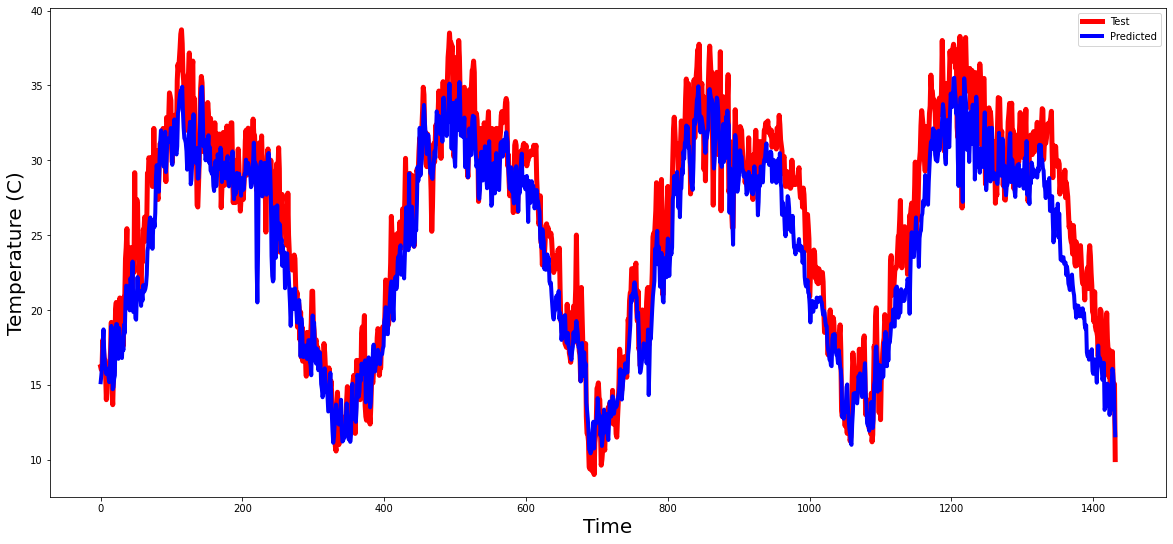

In [32]:
# Y_test_inv=Y_test_inv[:200]
# temp_f=temp_f[:200]
import matplotlib.pyplot as plt
plt.figure(figsize=(20,9))
plt.plot(Y_test_inv , 'red', linewidth=5)
plt.plot(temp_f,'blue' , linewidth=4)
plt.xlabel("Time", fontsize=20)
plt.ylabel("Temperature (C)", fontsize=20)
plt.legend(('Test','Predicted'))
plt.show()

In [37]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,accuracy_score
from sklearn import metrics

In [38]:
Y_test_inv

array([[16.2       ],
       [16.        ],
       [16.28571429],
       ...,
       [14.0952381 ],
       [15.05263158],
       [10.        ]])

In [39]:
temp_f

array([[15.171482],
       [15.669224],
       [16.282404],
       ...,
       [14.960651],
       [12.875355],
       [11.624125]], dtype=float32)

In [42]:
mse=mean_squared_error(Y_test_inv,temp_f,squared=False)
mae=mean_absolute_error(Y_test_inv,temp_f)
print(f'{mse} {mae} {metrics.r2_score(Y_test_inv,temp_f)}')

2.589224977431546 2.0985046879815497 0.8684748032493032


In [44]:
from sklearn import metrics
mse=mean_squared_error(Y_test_inv,temp_rs,squared=False)
mae=mean_absolute_error(Y_test_inv,temp_rs)
print(f'{mse} {mae} {metrics.r2_score(Y_test_inv,temp_rs)}')

4.5346684877648284 3.64060707774925 0.5965771712221817


In [45]:
mse=mean_squared_error(Y_test_inv,temp_ts,squared=False)
mae=mean_absolute_error(Y_test_inv,temp_ts)
print(f'{mse} {mae} {metrics.r2_score(Y_test_inv,temp_ts)}')

1.488771056622912 1.085003872592043 0.9565164273940805


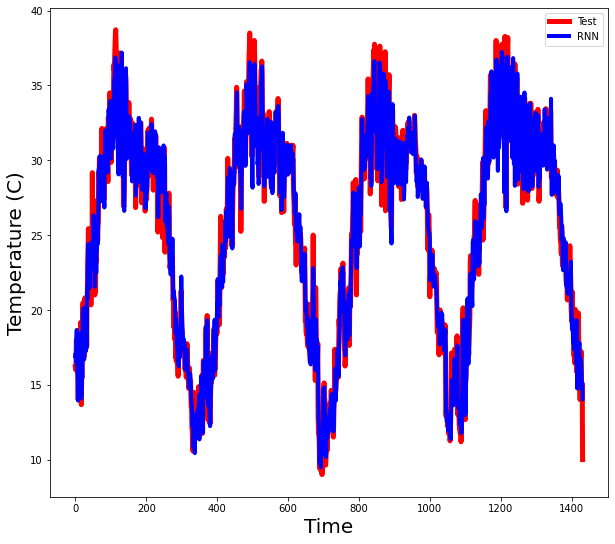

In [46]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,9))
plt.plot(Y_test_inv , 'red', linewidth=5)
plt.plot(temp_ts,'blue' , linewidth=4)
# plt.plot(temp_rs , 'black', linewidth=5)
plt.xlabel("Time", fontsize=20)
plt.ylabel("Temperature (C)", fontsize=20)
plt.legend(('Test','RNN','Regression'))
plt.show()

In [47]:
from sklearn import metrics
metrics.r2_score(Y_test_inv,temp_f)

0.8684748032493032

In [48]:
model1=models.load_model("Models/model2_R.h5")

In [49]:
test=pd.read_csv("archive/DailyDelhiClimateTest.csv")
test

,date,meantemp,humidity,wind_speed,meanpressure
0,2017-01-01,15.913043,85.869565,2.743478,59.000000
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333
...,...,...,...,...,...
109,2017-04-20,34.500000,27.500000,5.562500,998.625000
110,2017-04-21,34.250000,39.375000,6.962500,999.875000
111,2017-04-22,32.900000,40.900000,8.890000,1001.600000
112,2017-04-23,32.875000,27.500000,9.962500,1002.125000


In [50]:
test.isnull().sum()

test["date"]=pd.to_datetime(test["date"])
test.set_index("date",inplace=True)
test

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2017-01-01,15.913043,85.869565,2.743478,59.000000
2017-01-02,18.500000,77.222222,2.894444,1018.277778
2017-01-03,17.111111,81.888889,4.016667,1018.333333
2017-01-04,18.700000,70.050000,4.545000,1015.700000
2017-01-05,18.388889,74.944444,3.300000,1014.333333
...,...,...,...,...
2017-04-20,34.500000,27.500000,5.562500,998.625000
2017-04-21,34.250000,39.375000,6.962500,999.875000
2017-04-22,32.900000,40.900000,8.890000,1001.600000


In [51]:
def extract_year(value):
  value=value.strftime('%Y-%m-%d')
  return (value[0:4])

def extract_month(value):
    value=value.strftime('%Y-%m-%d')
    return (value[4:6])

def extract_date(value):
    value=value.strftime('%Y-%m-%d')
    return (value[6:8])

In [52]:
test.reset_index(inplace=True)

In [53]:
test['day'] = test['date'].dt.day
test['month'] = test['date'].dt.month
test['year'] = test['date'].dt.year

test
temp=test.drop(["wind_speed"],axis=1)
temp=temp.append(test["wind_speed"])

In [54]:
test.isnull().sum()

test=test.drop(["date"],axis=1)
test

,meantemp,humidity,wind_speed,meanpressure,day,month,year
0,15.913043,85.869565,2.743478,59.000000,1,1,2017
1,18.500000,77.222222,2.894444,1018.277778,2,1,2017
2,17.111111,81.888889,4.016667,1018.333333,3,1,2017
3,18.700000,70.050000,4.545000,1015.700000,4,1,2017
4,18.388889,74.944444,3.300000,1014.333333,5,1,2017
...,...,...,...,...,...,...,...
109,34.500000,27.500000,5.562500,998.625000,20,4,2017
110,34.250000,39.375000,6.962500,999.875000,21,4,2017
111,32.900000,40.900000,8.890000,1001.600000,22,4,2017
112,32.875000,27.500000,9.962500,1002.125000,23,4,2017


In [55]:
X_part=test.drop(["meantemp"],axis=1)
X_part=X_part[['humidity','meanpressure','wind_speed','day','month','year']]
X_part

,humidity,meanpressure,wind_speed,day,month,year
0,85.869565,59.000000,2.743478,1,1,2017
1,77.222222,1018.277778,2.894444,2,1,2017
2,81.888889,1018.333333,4.016667,3,1,2017
3,70.050000,1015.700000,4.545000,4,1,2017
4,74.944444,1014.333333,3.300000,5,1,2017
...,...,...,...,...,...,...
109,27.500000,998.625000,5.562500,20,4,2017
110,39.375000,999.875000,6.962500,21,4,2017
111,40.900000,1001.600000,8.890000,22,4,2017
112,27.500000,1002.125000,9.962500,23,4,2017


In [56]:
Y_part=test["meantemp"]
X_part=np.array(X_part)
Y_part=np.array(Y_part).reshape(-1,1)
print(X_part.shape)
print(Y_part.shape)

(114, 6)
(114, 1)


In [57]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [58]:
scaler2=MinMaxScaler(feature_range=[-1,1])
X_part_scaled=scaler2.fit_transform(X_part)
Y_part_scaled=scaler2.fit_transform(Y_part)

In [59]:
step=30
input=[]
output=[]
for i in range(len(X_part_scaled)-(step)):
    input.append(X_part_scaled[i:i+step])
    output.append(Y_part_scaled[i+step])
 
input=np.array(input)
output=np.array(output)

In [60]:
print(input.shape)
print(output.shape)

(84, 30, 6)
(84, 1)


In [61]:
temp_rs=model1.predict(input)

temp_rs=scaler2.inverse_transform(temp_rs)
temp_rs

array([[18.97319 ],
       [20.171644],
       [18.995571],
       [19.215576],
       [19.967194],
       [19.790524],
       [19.085464],
       [19.174805],
       [19.411327],
       [18.943674],
       [19.102009],
       [18.970554],
       [19.118546],
       [19.366026],
       [19.19077 ],
       [19.409092],
       [19.18638 ],
       [19.197336],
       [19.683582],
       [20.73121 ],
       [20.257313],
       [21.35652 ],
       [21.705265],
       [21.317158],
       [26.857388],
       [26.873638],
       [26.776585],
       [21.087114],
       [16.428858],
       [16.69423 ],
       [17.73611 ],
       [18.156042],
       [19.46356 ],
       [17.244621],
       [15.565108],
       [15.02988 ],
       [14.547262],
       [15.047916],
       [15.523956],
       [15.695711],
       [15.902888],
       [16.079716],
       [16.142323],
       [16.086203],
       [16.223791],
       [16.198984],
       [16.244404],
       [17.58188 ],
       [18.118587],
       [21.057007],


In [3]:
test=pd.read_csv("archive/DailyDelhiClimateTest.csv")
test

,date,meantemp,humidity,wind_speed,meanpressure
0,2017-01-01,15.913043,85.869565,2.743478,59.000000
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333
...,...,...,...,...,...
109,2017-04-20,34.500000,27.500000,5.562500,998.625000
110,2017-04-21,34.250000,39.375000,6.962500,999.875000
111,2017-04-22,32.900000,40.900000,8.890000,1001.600000
112,2017-04-23,32.875000,27.500000,9.962500,1002.125000


In [4]:
timeseries_test=test.copy()
timeseries_test["date"].dtype
timeseries_test["date"]=pd.to_datetime(timeseries_test["date"])
timeseries_test.set_index("date",inplace=True)
timeseries_test

test_data_temp=pd.DataFrame(list(timeseries_test["meantemp"]),columns=["temp"])
test_data_temp

,temp
0,15.913043
1,18.500000
2,17.111111
3,18.700000
4,18.388889
...,...
109,34.500000
110,34.250000
111,32.900000
112,32.875000


In [5]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
scaler=MinMaxScaler(feature_range=(-1,1))
test_data_temp=scaler.fit_transform(test_data_temp)

In [6]:
steps=30
X_test=[]
Y_test=[]
for i in range(len(test_data_temp)-steps):
  X_test.append(test_data_temp[i:i+steps])
  Y_test.append(test_data_temp[i+steps])
X_test=np.array(X_test)
Y_test=np.array(Y_test)

print(X_test.shape)
print(Y_test.shape)

(84, 30, 1)
(84, 1)


In [7]:
X_test=np.array(X_test)
Y_test=np.array(Y_test)

print(X_test.shape)
print(Y_test.shape)

(84, 30, 1)
(84, 1)


In [8]:
model2=models.load_model("Models/model1_ts.h5")

temp_ts=model2.predict(X_test)
temp_ts=scaler.inverse_transform(temp_ts)
temp_ts

array([[16.546803],
       [17.149555],
       [16.645927],
       [17.436497],
       [15.739906],
       [16.204636],
       [18.892931],
       [16.577702],
       [16.964073],
       [15.891701],
       [16.815353],
       [16.3698  ],
       [17.825586],
       [17.033907],
       [17.20452 ],
       [17.824074],
       [18.583744],
       [18.207615],
       [19.04844 ],
       [19.917786],
       [21.509396],
       [21.611456],
       [19.762861],
       [18.384346],
       [17.629728],
       [19.527636],
       [20.172989],
       [19.60433 ],
       [20.018713],
       [20.525263],
       [23.165108],
       [23.193035],
       [21.479527],
       [20.636496],
       [20.575119],
       [21.603281],
       [23.749954],
       [22.472183],
       [22.520998],
       [21.12835 ],
       [21.207203],
       [18.112328],
       [18.325731],
       [19.821566],
       [19.118061],
       [19.73368 ],
       [18.440344],
       [21.828085],
       [21.758833],
       [22.017479],


In [10]:
Y_test_inv=scaler.inverse_transform(Y_test)


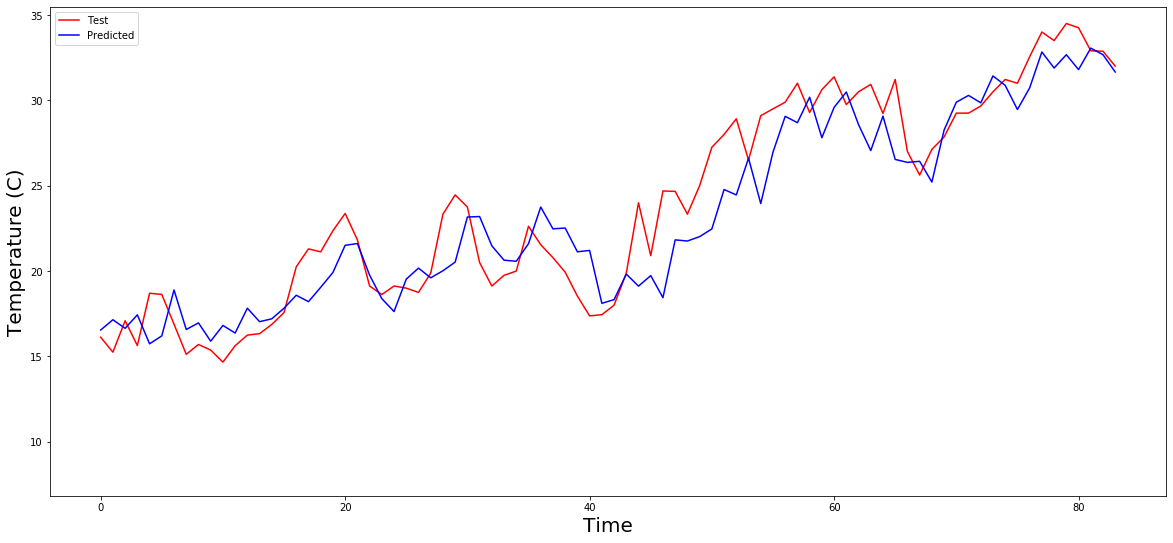

In [29]:
import matplotlib.pyplot as plt
scale_factor=0.5
plt.figure(figsize=(20,9))
plt.plot(Y_test_inv , 'red')
plt.plot(temp_ts,'blue')
# ymin,ymax=plt.ylim()
plt.ylim(ymin * scale_factor, ymax)
plt.xlabel("Time", fontsize=20)
plt.ylabel("Temperature (C)", fontsize=20)
plt.legend(('Test','Predicted'))
plt.show()


In [12]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,accuracy_score
from sklearn import metrics

In [15]:
mse=mean_squared_error(Y_test_inv,temp_ts)
mae=mean_absolute_error(Y_test_inv,temp_ts)
print(f'{mse} {mae} {metrics.r2_score(Y_test_inv,temp_ts)}')

4.7986178437162295 1.716721352503077 0.8618039907694741


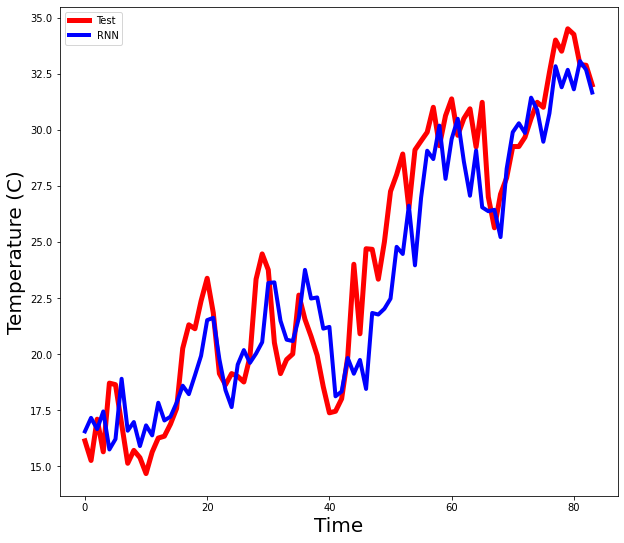

In [74]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,9))
plt.plot(Y_test_inv , 'red', linewidth=5)
plt.plot(temp_ts,'blue' , linewidth=4)
# plt.plot(temp_rs , 'black', linewidth=5)
plt.xlabel("Time", fontsize=20)
plt.ylabel("Temperature (C)", fontsize=20)
plt.legend(('Test','RNN','Regression'))
plt.show()